In [3]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

data = pd.read_csv('C:/titanic.csv', index_col=0)

In [4]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data:
    data[i]=le.fit_transform(data[i])

In [8]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,2,108,1,28,1,0,523,18,147,2
2,1,0,190,0,51,1,0,596,207,81,0
3,1,2,353,0,34,0,0,669,41,147,2
4,1,0,272,0,47,1,0,49,189,55,2
5,0,2,15,1,47,0,0,472,43,147,2
...,...,...,...,...,...,...,...,...,...,...,...
887,0,1,548,1,35,0,0,101,85,147,2
888,1,0,303,0,24,0,0,14,153,30,2
889,0,2,413,0,88,1,2,675,131,147,2


In [21]:
#Splitting the data into training and test test
X = data.iloc[:,0:10].values
y = data.iloc[:,10].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [22]:
X

array([[  0,   2, 108, ..., 523,  18, 147],
       [  1,   0, 190, ..., 596, 207,  81],
       [  1,   2, 353, ..., 669,  41, 147],
       ...,
       [  0,   2, 413, ..., 675, 131, 147],
       [  1,   0,  81, ...,   8, 153,  60],
       [  0,   2, 220, ..., 466,  30, 147]], dtype=int64)

In [23]:
Y

array([[0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       ...,
       [0, 0, 1, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]], dtype=uint8)

In [26]:
#Defining the model 

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(60,input_shape=(10,),activation='ReLU'))
model.add(Dense(60,activation='ReLU'))
model.add(Dense(40,activation='ReLU'))
model.add(Dense(40,activation='ReLU'))
model.add(Dense(4,activation='softmax'))

model.compile(Adam(lr=0.04),'categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 60)                660       
                                                                 
 dense_16 (Dense)            (None, 60)                3660      
                                                                 
 dense_17 (Dense)            (None, 40)                2440      
                                                                 
 dense_18 (Dense)            (None, 40)                1640      
                                                                 
 dense_19 (Dense)            (None, 4)                 164       
                                                                 
Total params: 8,564
Trainable params: 8,564
Non-trainable params: 0
_________________________________________________________________


In [27]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 1s 13ms/step - loss: 14.7675 - accuracy: 0.6096 - val_loss: 0.7859 - val_accuracy: 0.7095
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7857 - accuracy: 0.7261 - val_loss: 0.7611 - val_accuracy: 0.7095
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7626 - accuracy: 0.7261 - val_loss: 0.7558 - val_accuracy: 0.7095
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7776 - accuracy: 0.7261 - val_loss: 0.7590 - val_accuracy: 0.7095
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.7702 - accuracy: 0.7261 - val_loss: 0.7404 - val_accuracy: 0.7095
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7729 - accuracy: 0.7261 - val_loss: 0.7596 - val_accuracy: 0.7095
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 0.7884 - accuracy: 0.7261 - val_loss: 0.7654 - val_accuracy: 0.7095
Epoch 8/100

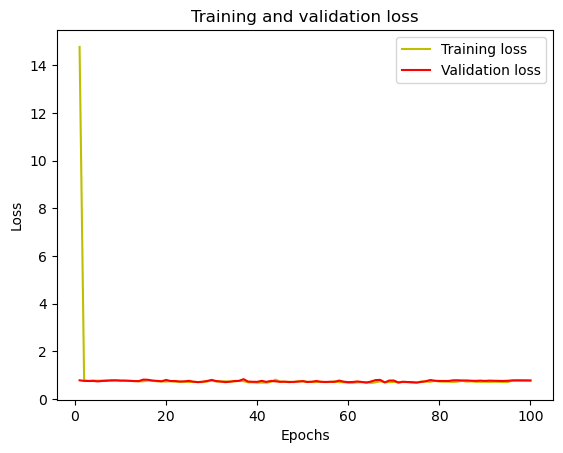

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

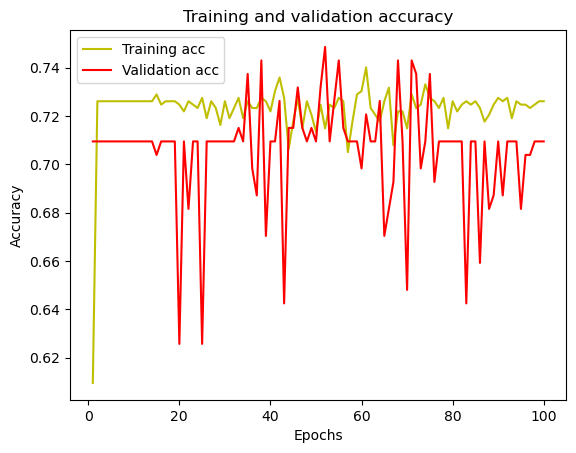

In [29]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [30]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.00      0.00      0.00        13
           2       0.71      1.00      0.83       127

    accuracy                           0.71       179
   macro avg       0.24      0.33      0.28       179
weighted avg       0.50      0.71      0.59       179

[[  0   0  39]
 [  0   0  13]
 [  0   0 127]]


C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\charl\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
